# Assignment Title: Cardiovascular Risk Prediction Using Machine Learning

# 1.0 Data Loading

importing libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

#model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV


## 1.1 Train Set

In [2]:
#loading train set data
df = pd.read_csv('cardio_train.csv', sep=';')


## 1.2 Test Set

In [44]:
#loading test set data
df_test = pd.read_csv('test_set.csv', sep=';')

Features (columns info):

- ID
- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code |
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

# 2.0 Data Inspection

## 2.1 Train Set

In [3]:
df. head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168.0,62.0,110,80,1.0,1,0,0.0,1,0
1,1,20228,1,156.0,85.0,140,90,3.0,1,0,0.0,1,1
2,2,18857,1,165.0,64.0,130,70,3.0,1,0,0.0,0,1
3,3,17623,2,169.0,82.0,150,100,1.0,1,0,0.0,1,1
4,4,17474,1,156.0,56.0,100,60,1.0,1,0,0.0,0,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70003.0,49970.283431,28852.529858,0.0,25002.5,50000.0,74887.5,99999.0
age,70003.0,19468.876134,2467.212795,10798.0,17664.0,19703.0,21327.0,23713.0
gender,70003.0,1.349585,0.476842,1.0,1.0,1.0,2.0,2.0
height,70001.0,164.359023,8.210026,55.0,159.0,165.0,170.0,250.0
weight,70002.0,74.206013,14.396345,10.0,65.0,72.0,82.0,200.0
ap_hi,70003.0,128.817479,154.008162,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70003.0,96.629987,188.468505,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70001.0,1.366909,0.680255,1.0,1.0,1.0,2.0,3.0
gluc,70003.0,1.226476,0.572299,1.0,1.0,1.0,1.0,3.0
smoke,70003.0,0.088125,0.283478,0.0,0.0,0.0,0.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70003 entries, 0 to 70002
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70003 non-null  int64  
 1   age          70003 non-null  int64  
 2   gender       70003 non-null  int64  
 3   height       70001 non-null  float64
 4   weight       70002 non-null  float64
 5   ap_hi        70003 non-null  int64  
 6   ap_lo        70003 non-null  int64  
 7   cholesterol  70001 non-null  float64
 8   gluc         70003 non-null  int64  
 9   smoke        70003 non-null  int64  
 10  alco         70002 non-null  float64
 11  active       70003 non-null  int64  
 12  cardio       70003 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 6.9 MB


In [6]:
#return the sum of uniques values in each column
df.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

## 2.2 Test Set

In [45]:
df_test.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,1,14791,2,165,60.0,120,80,1,1,0,0,0,0
1,2,11817,1,159,77.0,111,68,1,1,0,0,1,0
2,3,14531,2,181,95.0,129,90,1,1,1,1,1,0
3,4,16782,2,172,112.0,120,80,1,1,0,0,0,1
4,5,21197,2,167,92.0,140,80,1,1,0,0,1,1


In [46]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5.0,3.0,1.581139,1.0,2.0,3.0,4.0,5.0
age,5.0,15823.6,3485.035122,11817.0,14531.0,14791.0,16782.0,21197.0
gender,5.0,1.8,0.447214,1.0,2.0,2.0,2.0,2.0
height,5.0,168.8,8.258329,159.0,165.0,167.0,172.0,181.0
weight,5.0,87.2,19.639246,60.0,77.0,92.0,95.0,112.0
ap_hi,5.0,124.0,10.977249,111.0,120.0,120.0,129.0,140.0
ap_lo,5.0,79.6,7.797435,68.0,80.0,80.0,80.0,90.0
cholesterol,5.0,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
gluc,5.0,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
smoke,5.0,0.2,0.447214,0.0,0.0,0.0,0.0,1.0


In [47]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           5 non-null      int64  
 1   age          5 non-null      int64  
 2   gender       5 non-null      int64  
 3   height       5 non-null      int64  
 4   weight       5 non-null      float64
 5   ap_hi        5 non-null      int64  
 6   ap_lo        5 non-null      int64  
 7   cholesterol  5 non-null      int64  
 8   gluc         5 non-null      int64  
 9   smoke        5 non-null      int64  
 10  alco         5 non-null      int64  
 11  active       5 non-null      int64  
 12  cardio       5 non-null      int64  
dtypes: float64(1), int64(12)
memory usage: 648.0 bytes


In [48]:
df_test.nunique()

id             5
age            5
gender         2
height         5
weight         5
ap_hi          4
ap_lo          3
cholesterol    1
gluc           1
smoke          2
alco           2
active         2
cardio         2
dtype: int64

# 3.0 Data Cleaning

## 3.1 Train Set

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70003 entries, 0 to 70002
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70003 non-null  int64  
 1   age          70003 non-null  int64  
 2   gender       70003 non-null  int64  
 3   height       70001 non-null  float64
 4   weight       70002 non-null  float64
 5   ap_hi        70003 non-null  int64  
 6   ap_lo        70003 non-null  int64  
 7   cholesterol  70001 non-null  float64
 8   gluc         70003 non-null  int64  
 9   smoke        70003 non-null  int64  
 10  alco         70002 non-null  float64
 11  active       70003 non-null  int64  
 12  cardio       70003 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 6.9 MB


### 3.1.1 Dealing with Outliers

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70003.0,49970.283431,28852.529858,0.0,25002.5,50000.0,74887.5,99999.0
age,70003.0,19468.876134,2467.212795,10798.0,17664.0,19703.0,21327.0,23713.0
gender,70003.0,1.349585,0.476842,1.0,1.0,1.0,2.0,2.0
height,70001.0,164.359023,8.210026,55.0,159.0,165.0,170.0,250.0
weight,70002.0,74.206013,14.396345,10.0,65.0,72.0,82.0,200.0
ap_hi,70003.0,128.817479,154.008162,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70003.0,96.629987,188.468505,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70001.0,1.366909,0.680255,1.0,1.0,1.0,2.0,3.0
gluc,70003.0,1.226476,0.572299,1.0,1.0,1.0,1.0,3.0
smoke,70003.0,0.088125,0.283478,0.0,0.0,0.0,0.0,1.0


<Axes: >

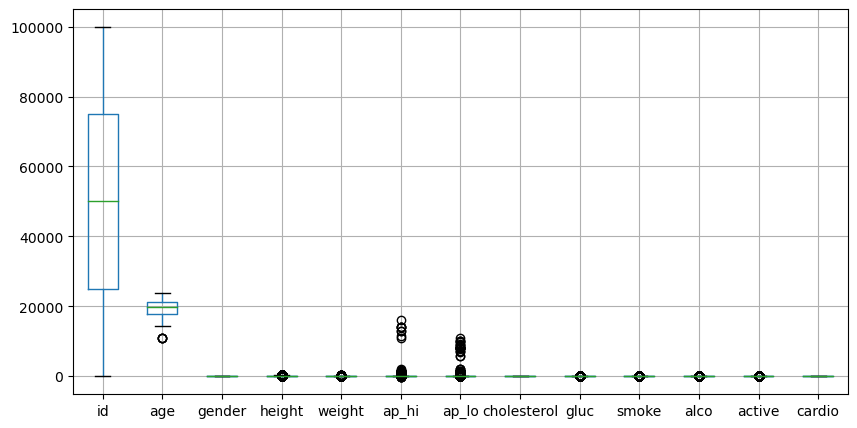

In [9]:
df.boxplot(figsize=(10,5))

In [10]:
#Clippig the outliers within a reasonable range
df['id'] = df['id'].clip(upper=430)

### 3.1.2 Dealing with Missing Data

In [11]:
df.isna().sum()

id             0
age            0
gender         0
height         2
weight         1
ap_hi          0
ap_lo          0
cholesterol    2
gluc           0
smoke          0
alco           1
active         0
cardio         0
dtype: int64

In [12]:
df = df.dropna(subset=['cardio'])

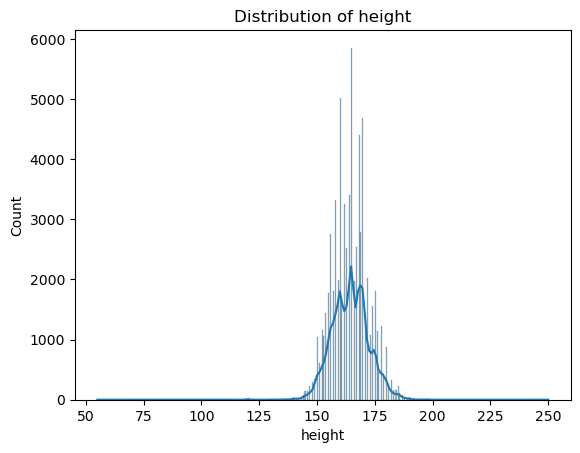

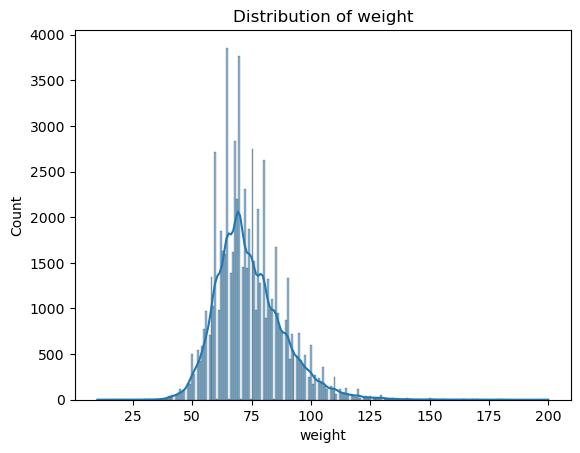

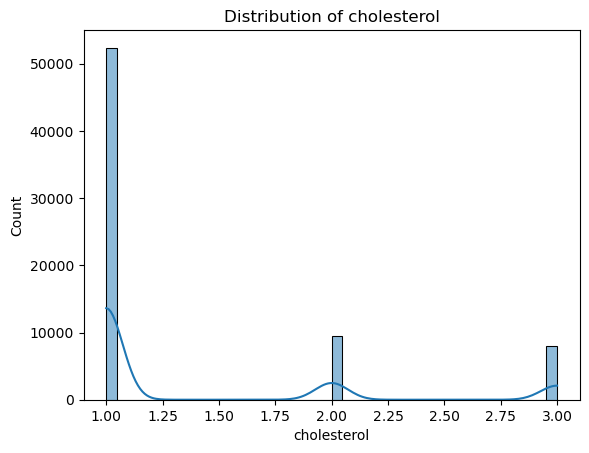

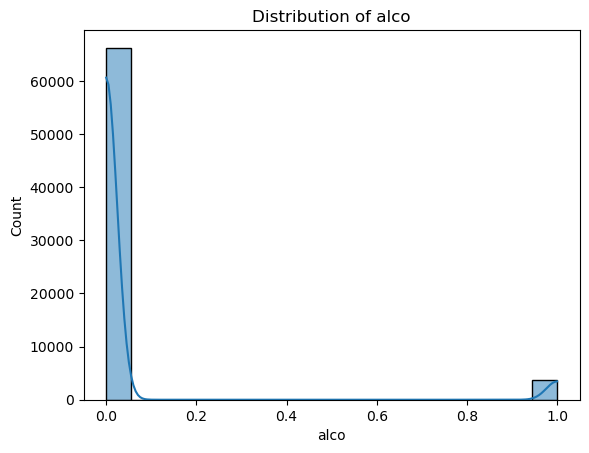

In [13]:
sns.histplot(df['height'], kde=True)
plt.title('Distribution of height')
plt.show()

sns.histplot(df['weight'], kde=True)
plt.title('Distribution of weight')
plt.show()

sns.histplot(df['cholesterol'], kde=True)
plt.title('Distribution of cholesterol')
plt.show()

sns.histplot(df['alco'], kde=True)
plt.title('Distribution of alco')
plt.show()


In [14]:
df['height'].fillna(df['height'].mean(), inplace=True)
df['weight'].fillna(df['weight'].mean(), inplace=True)
df['cholesterol'].fillna(df['cholesterol'].mean(), inplace=True)
df['alco'].fillna(df['alco'].mean(), inplace=True)

In [15]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70003 entries, 0 to 70002
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70003 non-null  int64  
 1   age          70003 non-null  int64  
 2   gender       70003 non-null  int64  
 3   height       70003 non-null  float64
 4   weight       70003 non-null  float64
 5   ap_hi        70003 non-null  int64  
 6   ap_lo        70003 non-null  int64  
 7   cholesterol  70003 non-null  float64
 8   gluc         70003 non-null  int64  
 9   smoke        70003 non-null  int64  
 10  alco         70003 non-null  float64
 11  active       70003 non-null  int64  
 12  cardio       70003 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 6.9 MB


### 3.1.3 Dealing with Duplicate Data

In [17]:
df.duplicated().sum()

27

## 3.2 Test Set

In [49]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           5 non-null      int64  
 1   age          5 non-null      int64  
 2   gender       5 non-null      int64  
 3   height       5 non-null      int64  
 4   weight       5 non-null      float64
 5   ap_hi        5 non-null      int64  
 6   ap_lo        5 non-null      int64  
 7   cholesterol  5 non-null      int64  
 8   gluc         5 non-null      int64  
 9   smoke        5 non-null      int64  
 10  alco         5 non-null      int64  
 11  active       5 non-null      int64  
 12  cardio       5 non-null      int64  
dtypes: float64(1), int64(12)
memory usage: 648.0 bytes


### 3.2.1 Dealing with Outliers

In [50]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5.0,3.0,1.581139,1.0,2.0,3.0,4.0,5.0
age,5.0,15823.6,3485.035122,11817.0,14531.0,14791.0,16782.0,21197.0
gender,5.0,1.8,0.447214,1.0,2.0,2.0,2.0,2.0
height,5.0,168.8,8.258329,159.0,165.0,167.0,172.0,181.0
weight,5.0,87.2,19.639246,60.0,77.0,92.0,95.0,112.0
ap_hi,5.0,124.0,10.977249,111.0,120.0,120.0,129.0,140.0
ap_lo,5.0,79.6,7.797435,68.0,80.0,80.0,80.0,90.0
cholesterol,5.0,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
gluc,5.0,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
smoke,5.0,0.2,0.447214,0.0,0.0,0.0,0.0,1.0


In [51]:
df_test.boxplot(figsize=(10,5))

<Axes: >

In [52]:
#Clippig the outliers within a reasonable range
df_test['id'] = df_test['id'].clip(upper=430)

### 3.2.2 Dealing with Missing Data

In [53]:
df_test.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### 3.2.3 Dealing with Duplicated Data

In [54]:
df_test.duplicated().sum()

0

# 4.0 EDA

## 4.1 Train Set

In [18]:
#seperating the con vs cat columns
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [19]:
df_con = df[['id', 'age', 'height', 'weight', 'ap_hi', 'ap_lo','cholesterol', 'gluc', 'alco']]

In [20]:
#setting the color palette
sns.palplot(sns.color_palette('Accent'))

sns.set_palette('Accent')
sns.set_style('whitegrid')

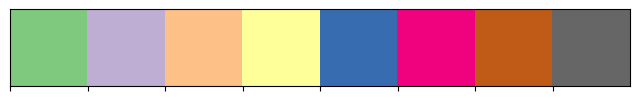

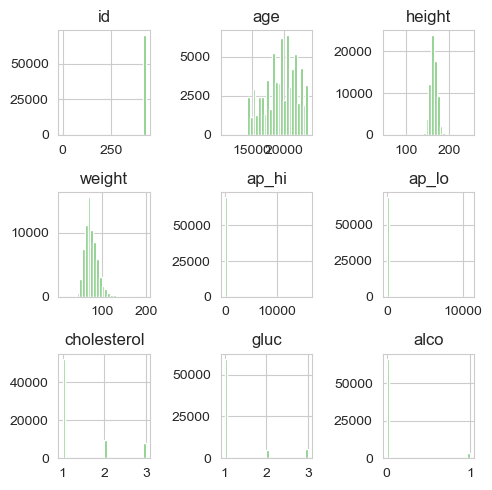

In [21]:
#plot histogram for each continuous variable
df_con.hist(bins=30, figsize=(5,5),layout=(3,3))
plt.tight_layout()
plt.show()

In [22]:
df_cat = df.drop(df_con.columns, axis=1)

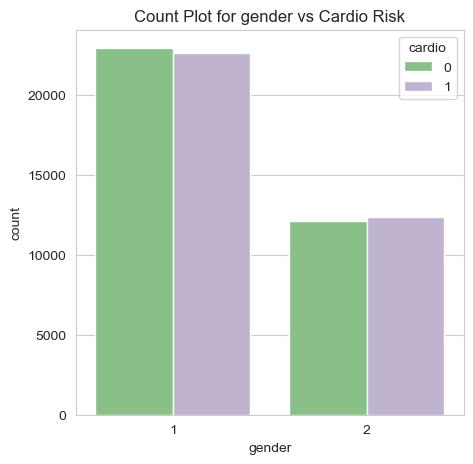

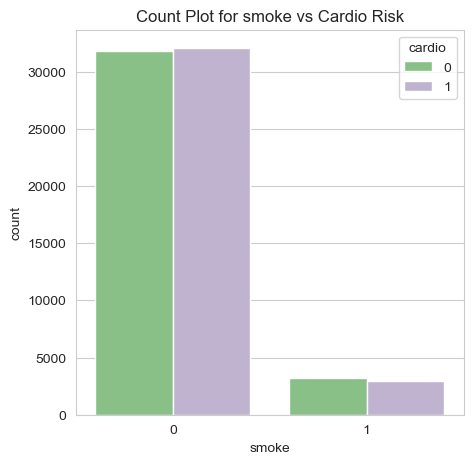

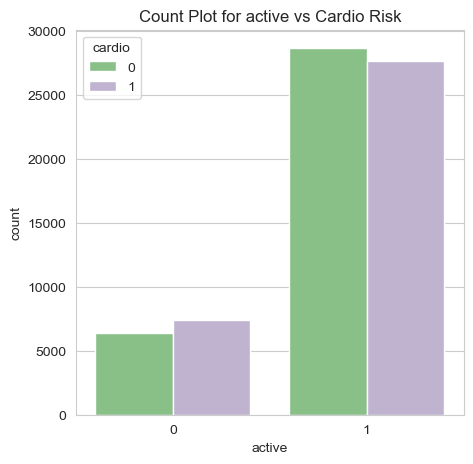

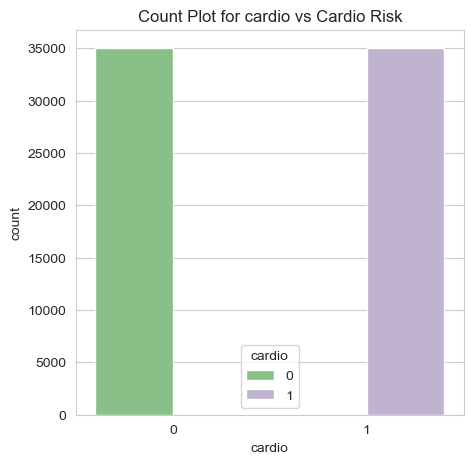

In [23]:
# count plot for categorical data
# Loop over each columns in the cat df

for column in df_cat.columns:
    plt.figure(figsize=(5,5))
    sns.countplot(x=column, hue='cardio', data=df_cat)

    #set the title for each count plot
    plt.title(f"Count Plot for {column} vs Cardio Risk")
    plt.show()


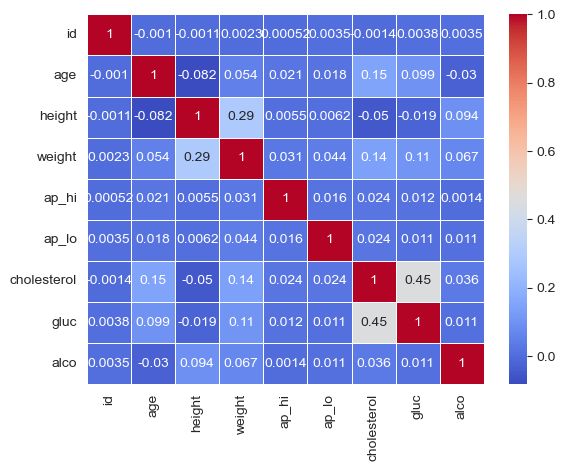

In [24]:
#correlation heatmap
sns.heatmap(df_con.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

## 4.2 Test Set

In [55]:
#seperating the con vs cat columns
df_test.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [56]:
df_test_con = df_test[['id', 'age', 'height', 'weight', 'ap_hi', 'ap_lo','cholesterol', 'gluc', 'alco']]

In [57]:
#setting the color palette
sns.palplot(sns.color_palette('Accent'))

sns.set_palette('Accent')
sns.set_style('whitegrid')

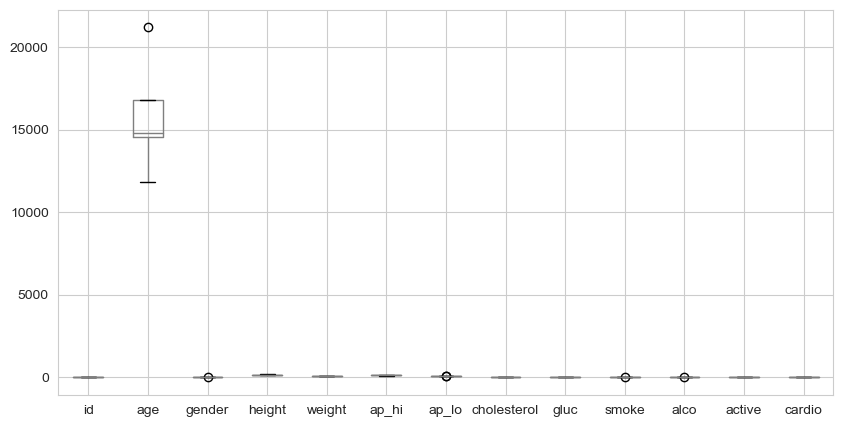

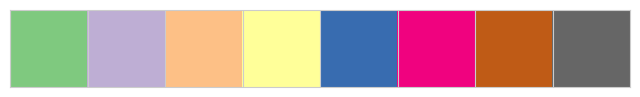

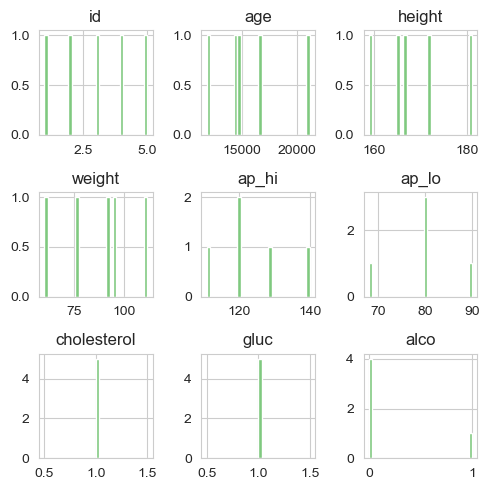

In [58]:
#plot histogram for each continuous variable
df_test_con.hist(bins=30, figsize=(5,5),layout=(3,3))
plt.tight_layout()
plt.show()

In [59]:
df_test_cat = df_test.drop(df_test_con.columns, axis=1)

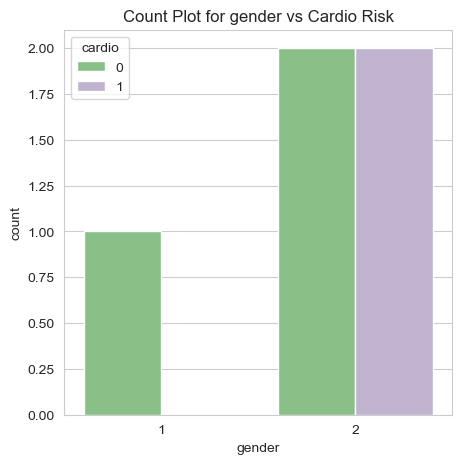

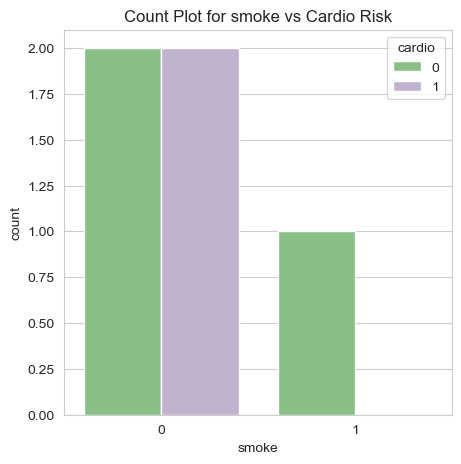

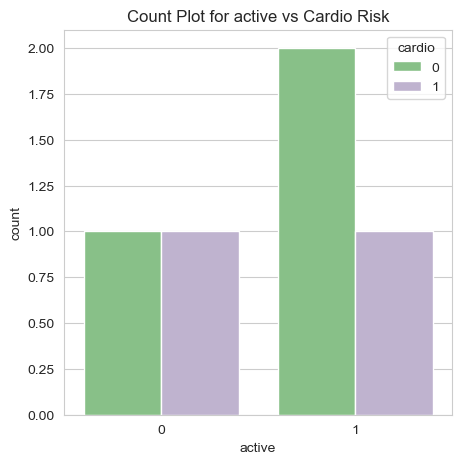

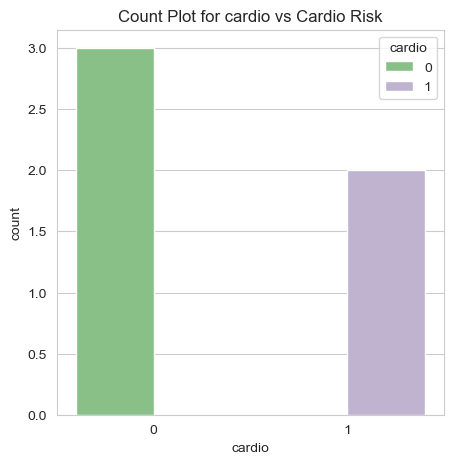

In [60]:
# count plot for categorical data
# Loop over each columns in the cat df

for column in df_test_cat.columns:
    plt.figure(figsize=(5,5))
    sns.countplot(x=column, hue='cardio', data=df_test_cat)

    #set the title for each count plot
    plt.title(f"Count Plot for {column} vs Cardio Risk")
    plt.show()


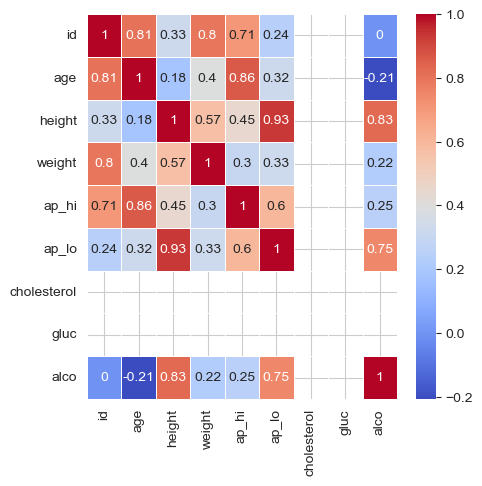

In [61]:
#correlation heatmap
sns.heatmap(df_test_con.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

# 5.0 Feature Engineering

## 5.1 Train Set

### 5.1.1 Binning/Bucketing

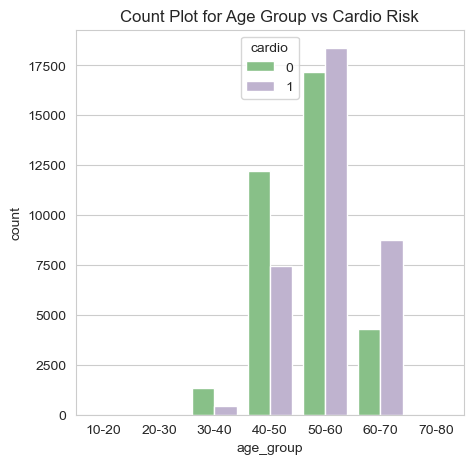

In [25]:
#bin continuous variables like 'age'
df['age_in_years'] = df['age'] / 365

df['age_group'] = pd.cut((df['age'] / 365), bins=[10, 20, 30, 40, 50, 60, 70, 80], labels=['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

#plot the count plot for age_group vs output
plt.figure(figsize=(5,5))
sns.countplot(x='age_group', hue='cardio', data=df)
plt.title("Count Plot for Age Group vs Cardio Risk")
plt.show()

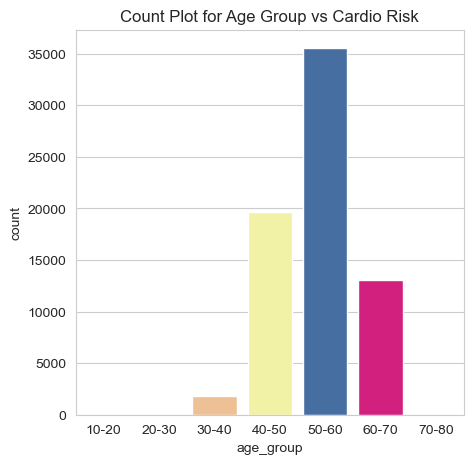

In [26]:
plt.figure(figsize=(5,5))
sns.countplot(x='age_group', data=df)
plt.title("Count Plot for Age Group vs Cardio Risk")
plt.show()

In [27]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,age_group
0,0,18393,2,168.0,62.0,110,80,1.0,1,0,0.0,1,0,50.391781,50-60
1,1,20228,1,156.0,85.0,140,90,3.0,1,0,0.0,1,1,55.419178,50-60
2,2,18857,1,165.0,64.0,130,70,3.0,1,0,0.0,0,1,51.663014,50-60
3,3,17623,2,169.0,82.0,150,100,1.0,1,0,0.0,1,1,48.282192,40-50
4,4,17474,1,156.0,56.0,100,60,1.0,1,0,0.0,0,0,47.873973,40-50


## 5.2 Test Set

### 5.2.1 Binning/Bucketing

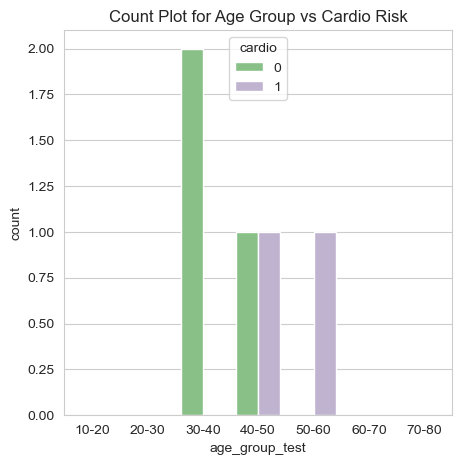

In [62]:
#bin continuous variables like 'age'
df_test['age_in_years_test'] = df_test['age'] / 365

df_test['age_group_test'] = pd.cut((df_test['age'] / 365), bins=[10, 20, 30, 40, 50, 60, 70, 80], labels=['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

#plot the count plot for age_group vs output
plt.figure(figsize=(5,5))
sns.countplot(x='age_group_test', hue='cardio', data=df_test)
plt.title("Count Plot for Age Group vs Cardio Risk")
plt.show()

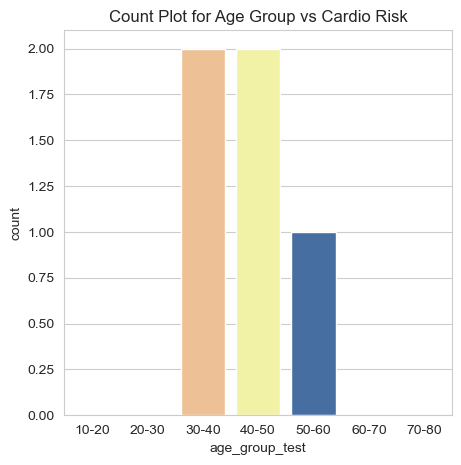

In [63]:
plt.figure(figsize=(5,5))
sns.countplot(x='age_group_test', data=df_test)
plt.title("Count Plot for Age Group vs Cardio Risk")
plt.show()

In [64]:
df_test.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years_test,age_group_test
0,1,14791,2,165,60.0,120,80,1,1,0,0,0,0,40.523288,40-50
1,2,11817,1,159,77.0,111,68,1,1,0,0,1,0,32.375342,30-40
2,3,14531,2,181,95.0,129,90,1,1,1,1,1,0,39.810959,30-40
3,4,16782,2,172,112.0,120,80,1,1,0,0,0,1,45.978082,40-50
4,5,21197,2,167,92.0,140,80,1,1,0,0,1,1,58.073973,50-60


# 6.0 Data Preprocessing

## 6.1 Train Set

In [28]:

X = df.drop(df[['cardio','age_group']], axis=1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_in_years
0,0,18393,2,168.0,62.0,110,80,1.0,1,0,0.0,1,50.391781
1,1,20228,1,156.0,85.0,140,90,3.0,1,0,0.0,1,55.419178
2,2,18857,1,165.0,64.0,130,70,3.0,1,0,0.0,0,51.663014
3,3,17623,2,169.0,82.0,150,100,1.0,1,0,0.0,1,48.282192
4,4,17474,1,156.0,56.0,100,60,1.0,1,0,0.0,0,47.873973


## 6.2 Test Set

In [65]:
X_new = df_test.drop(df_test[['cardio','age','age_group_test']], axis=1)
y_new = df_test['cardio']

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.05, random_state=42)

X_new.head()


,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_in_years_test
0,1,2,165,60.0,120,80,1,1,0,0,0,40.523288
1,2,1,159,77.0,111,68,1,1,0,0,1,32.375342
2,3,2,181,95.0,129,90,1,1,1,1,1,39.810959
3,4,2,172,112.0,120,80,1,1,0,0,0,45.978082
4,5,2,167,92.0,140,80,1,1,0,0,1,58.073973


# 7.0 Machine Learning Pipelines

## 7.1 Train Set

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70003 entries, 0 to 70002
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            70003 non-null  int64  
 1   age           70003 non-null  int64  
 2   gender        70003 non-null  int64  
 3   height        70003 non-null  float64
 4   weight        70003 non-null  float64
 5   ap_hi         70003 non-null  int64  
 6   ap_lo         70003 non-null  int64  
 7   cholesterol   70003 non-null  float64
 8   gluc          70003 non-null  int64  
 9   smoke         70003 non-null  int64  
 10  alco          70003 non-null  float64
 11  active        70003 non-null  int64  
 12  age_in_years  70003 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 6.9 MB


In [30]:
#creating pipeline for each model
pipelines = [
    ("MMS + LR", Pipeline([('scaler', MinMaxScaler()), ('lr', LogisticRegression())])),
    ('SS + LR', Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression())])),
    ('MMS + RF', Pipeline([('scaler', MinMaxScaler()), ('rf', RandomForestClassifier())])),
    ('SS + RF', Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())])),
    ('MMS + DT', Pipeline([('scaler', MinMaxScaler()), ('dt', DecisionTreeClassifier())])),
    ('SS + DT', Pipeline([('scaler', StandardScaler()), ('dt', DecisionTreeClassifier())])),
    ('MMS + KNN', Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])),
]


In [31]:
#Training all the pipelines
for name, pipe in pipelines:
    print(f"Training {name} pipeline")
    pipe.fit(X_train, y_train)

Training MMS + LR pipeline


c:\Users\asus\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training SS + LR pipeline
Training MMS + RF pipeline
Training SS + RF pipeline
Training MMS + DT pipeline
Training SS + DT pipeline
Training MMS + KNN pipeline


In [32]:
#model evaluation
pipe_dict = {}

#initialising best score to 0
best_score = 0.0

#instantiating an empty string to store the name of the best model
best_pipe = ''

#looping over each pipeline to evaluate them
for name, pipe in pipelines:
    y_pred = pipe.predict(X_test)

    pipe_dict[name] = [accuracy_score(y_test, y_pred), 
                          precision_score(y_test, y_pred),
                            recall_score(y_test, y_pred),
                                f1_score(y_test, y_pred, average = 'weighted')]
    
    if pipe.score(X_test, y_test) > best_score:
        best_score = pipe.score(X_test, y_test)
        best_pipe = name

print(f"The best model is {best_pipe} with an accuracy of {best_score}")

The best model is SS + LR with an accuracy of 0.7255844959763821


In [33]:
display(pipe_dict)

{'MMS + LR': [0.6510642350364269,
  0.6606780349167681,
  0.6202591957308938,
  0.6507312194728433],
 'SS + LR': [0.7255844959763821,
  0.7477222745837261,
  0.6803887935963407,
  0.7250200392183517],
 'MMS + RF': [0.7182991286129232,
  0.7264094955489614,
  0.6998284734133791,
  0.7182017227277967],
 'SS + RF': [0.7187752964144565,
  0.7295836669335468,
  0.6946826758147513,
  0.7186103489249862],
 'MMS + DT': [0.6339698109613828,
  0.635016835016835,
  0.6290261101581857,
  0.6339606085313146],
 'SS + DT': [0.6333507928193896,
  0.6346895487851909,
  0.6273108442919764,
  0.6333371003321114],
 'MMS + KNN': [0.6074472644159802,
  0.608110705362291,
  0.6030112445206784,
  0.607439353402049]}

In [34]:
name, model = pipelines[1]

print(name)
print(model)

print(pipelines[1][1])

SS + LR
Pipeline(steps=[('scaler', StandardScaler()), ('lr', LogisticRegression())])
Pipeline(steps=[('scaler', StandardScaler()), ('lr', LogisticRegression())])


## 7.2 Test Set

In [66]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5 non-null      int64  
 1   gender             5 non-null      int64  
 2   height             5 non-null      int64  
 3   weight             5 non-null      float64
 4   ap_hi              5 non-null      int64  
 5   ap_lo              5 non-null      int64  
 6   cholesterol        5 non-null      int64  
 7   gluc               5 non-null      int64  
 8   smoke              5 non-null      int64  
 9   alco               5 non-null      int64  
 10  active             5 non-null      int64  
 11  age_in_years_test  5 non-null      float64
dtypes: float64(2), int64(10)
memory usage: 608.0 bytes


In [67]:
#creating pipeline for each model
pipelines_test = [
    ("MMS + LR", Pipeline([('scaler', MinMaxScaler()), ('lr', LogisticRegression())])),
    ('SS + LR', Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression())])),
    ('MMS + RF', Pipeline([('scaler', MinMaxScaler()), ('rf', RandomForestClassifier())])),
    ('SS + RF', Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())])),
    ('MMS + DT', Pipeline([('scaler', MinMaxScaler()), ('dt', DecisionTreeClassifier())])),
    ('SS + DT', Pipeline([('scaler', StandardScaler()), ('dt', DecisionTreeClassifier())])),
    # Change the n_neighbors parameter to 4
    ('MMS + KNN', Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier(n_neighbors=4))])),
]


In [68]:
#Training all the pipelines_test
for name, pipe in pipelines_test:
    print(f"Training {name} pipeline")
    pipe.fit(X_train, y_train)

Training MMS + LR pipeline
Training SS + LR pipeline
Training MMS + RF pipeline
Training SS + RF pipeline
Training MMS + DT pipeline
Training SS + DT pipeline
Training MMS + KNN pipeline


In [69]:
#model evaluation
pipe_dict_test = {}

#initialising best score to 0
best_score_test = 0.0

#instantiating an empty string to store the name of the best model
best_pipe_test = ''

#looping over each pipeline to evaluate them
for name, pipe in pipelines_test:
    y_pred = pipe.predict(X_test)

    pipe_dict_test[name] = [accuracy_score(y_test, y_pred), 
                          precision_score(y_test, y_pred),
                            recall_score(y_test, y_pred),
                                f1_score(y_test, y_pred, average = 'weighted')]
    
    if pipe.score(X_test, y_test) > best_score_test:
        best_score_test = pipe.score(X_test, y_test)
        best_pipe_test = name

print(f"The best model is {best_pipe_test} with an accuracy of {best_score_test}")


c:\Users\asus\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asus\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asus\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asus\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetri

The best model is MMS + LR with an accuracy of 1.0


c:\Users\asus\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asus\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 8.0 Model Evaluation

## 8.1 Train Set

In [35]:
model_comparison_df = pd.DataFrame(pipe_dict, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

model_comparison_df.sort_values(by='F1 Score', axis=1, ascending=False).T

,Accuracy,Precision,Recall,F1 Score
SS + LR,0.725584,0.747722,0.680389,0.725020
SS + RF,0.718775,0.729584,0.694683,0.718610
MMS + RF,0.718299,0.726409,0.699828,0.718202
MMS + LR,0.651064,0.660678,0.620259,0.650731
MMS + DT,0.633970,0.635017,0.629026,0.633961
SS + DT,0.633351,0.634690,0.627311,0.633337
MMS + KNN,0.607447,0.608111,0.603011,0.607439


In [36]:
y_pred = pipelines[0][1].predict(X_test)

labels = ["No Cardiovascular Risk", "Has Cardiovascular Risk"]

cr = classification_report(y_test, y_pred, target_names = labels)
print(cr)



                         precision    recall  f1-score   support

 No Cardiovascular Risk       0.64      0.68      0.66     10507
Has Cardiovascular Risk       0.66      0.62      0.64     10494

               accuracy                           0.65     21001
              macro avg       0.65      0.65      0.65     21001
           weighted avg       0.65      0.65      0.65     21001



In [37]:
y_pred = pipelines[0][1].predict(X_test)

labels = ["No Cardiovascular Risk", "Has Cardiovascular Risk"]

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7164 3343]
 [3985 6509]]


## 8.2 Test Set

In [70]:
model_comparison_df_test = pd.DataFrame(pipe_dict_test, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

model_comparison_df_test.sort_values(by='F1 Score', axis=1, ascending=False).T

,Accuracy,Precision,Recall,F1 Score
MMS + LR,1.0,0.0,0.0,1.0
SS + LR,1.0,0.0,0.0,1.0
MMS + RF,1.0,0.0,0.0,1.0
SS + RF,1.0,0.0,0.0,1.0
MMS + DT,1.0,0.0,0.0,1.0
SS + DT,1.0,0.0,0.0,1.0
MMS + KNN,1.0,0.0,0.0,1.0


In [71]:
y_pred_test = pipelines_test[0][1].predict(X_test)

labels = ["No Cardiovascular Risk", "Has Cardiovascular Risk"]

cr_test = classification_report(y_test, y_pred_test, labels=labels)
print(cr_test)


                         precision    recall  f1-score   support

 No Cardiovascular Risk       0.00      0.00      0.00         0
Has Cardiovascular Risk       0.00      0.00      0.00         0

              micro avg       0.00      0.00      0.00         0
              macro avg       0.00      0.00      0.00         0
           weighted avg       0.00      0.00      0.00         0



c:\Users\asus\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asus\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asus\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asus\anaconda3\envs\ml\lib\site-packages\

In [72]:
y_pred = pipelines_test[0][1].predict(X_test)

labels = ["No Cardiovascular Risk", "Has Cardiovascular Risk"]

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1]]


# 9.0 Hyperparameter Tuning

## 9.1 Train Set

In [38]:
pipeline_ss_lr = Pipeline([("mms", StandardScaler()), ("lr", LogisticRegression())])

pipeline_ss_lr.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'mms', 'lr', 'mms__copy', 'mms__with_mean', 'mms__with_std', 'lr__C', 'lr__class_weight', 'lr__dual', 'lr__fit_intercept', 'lr__intercept_scaling', 'lr__l1_ratio', 'lr__max_iter', 'lr__multi_class', 'lr__n_jobs', 'lr__penalty', 'lr__random_state', 'lr__solver', 'lr__tol', 'lr__verbose', 'lr__warm_start'])

In [39]:
pipeline_ss_lr.get_params()

{'memory': None,
 'steps': [('mms', StandardScaler()), ('lr', LogisticRegression())],
 'verbose': False,
 'mms': StandardScaler(),
 'lr': LogisticRegression(),
 'mms__copy': True,
 'mms__with_mean': True,
 'mms__with_std': True,
 'lr__C': 1.0,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 100,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': None,
 'lr__solver': 'lbfgs',
 'lr__tol': 0.0001,
 'lr__verbose': 0,
 'lr__warm_start': False}

In [40]:
#grid search parameters
grid_params = {
    'lr__penalty': ['l1', 'l2'],
    'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'lr__max_iter': [100, 200, 300, 400, 500],
}

grid = GridSearchCV(pipeline_ss_lr, grid_params, cv=5, n_jobs=-1, verbose=1)

grid.fit(X_train, y_train)
#grid.fit(X,y)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


c:\Users\asus\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
175 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
175 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\asus\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\asus\anaconda3\envs\ml\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\asus\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_sol

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('mms', StandardScaler()),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'lr__max_iter': [100, 200, 300, 400, 500],
                         'lr__penalty': ['l1', 'l2']},
             verbose=1)

In [41]:
#print the best parameters
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Score: {grid.best_score_}")
print(f"Grid Search Best Score: {grid.score(X_test, y_test)}")


Best Parameters: {'lr__C': 1000, 'lr__max_iter': 100, 'lr__penalty': 'l2'}
Best Score: 0.7216847635289193
Grid Search Best Score: 0.7256321127565354


Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10507
           1       0.75      0.68      0.71     10494

    accuracy                           0.73     21001
   macro avg       0.73      0.73      0.73     21001
weighted avg       0.73      0.73      0.73     21001



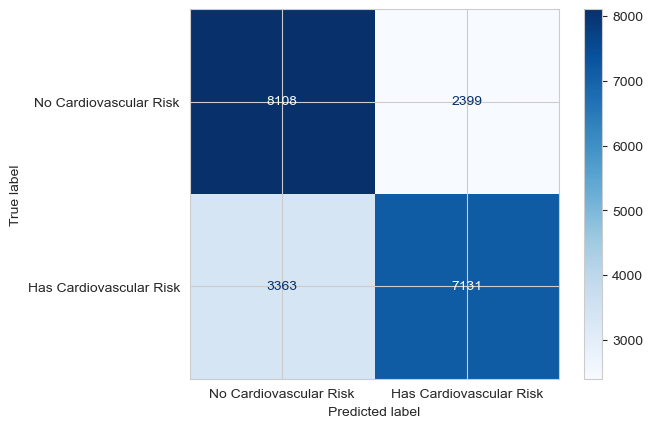

In [42]:
y_pred = grid.predict(X_test)

labels = ["No Cardiovascular Risk", "Has Cardiovascular Risk"]


# print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

#displaying confusion matrix using ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues")
plt.rcParams['figure.figsize'] = (5, 5)
plt.show()

## 9.2 Test Set

In [73]:
pipeline_ss_lr_new = Pipeline([("mms", StandardScaler()), ("lr", LogisticRegression())])

pipeline_ss_lr_new.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'mms', 'lr', 'mms__copy', 'mms__with_mean', 'mms__with_std', 'lr__C', 'lr__class_weight', 'lr__dual', 'lr__fit_intercept', 'lr__intercept_scaling', 'lr__l1_ratio', 'lr__max_iter', 'lr__multi_class', 'lr__n_jobs', 'lr__penalty', 'lr__random_state', 'lr__solver', 'lr__tol', 'lr__verbose', 'lr__warm_start'])

In [74]:
pipeline_ss_lr_new.get_params()

{'memory': None,
 'steps': [('mms', StandardScaler()), ('lr', LogisticRegression())],
 'verbose': False,
 'mms': StandardScaler(),
 'lr': LogisticRegression(),
 'mms__copy': True,
 'mms__with_mean': True,
 'mms__with_std': True,
 'lr__C': 1.0,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 100,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': None,
 'lr__solver': 'lbfgs',
 'lr__tol': 0.0001,
 'lr__verbose': 0,
 'lr__warm_start': False}

# 10.0 Save Model

In [75]:
import pickle

#save the best model from grid search
with open('model_cardio.pkl', 'wb') as f:
    pickle.dump(grid.best_estimator_,f)